<a href="https://colab.research.google.com/github/janasteinborn/MAT-421/blob/main/Homework11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 421 HW 11

Name: Jana Steinborn

# Numerical Error and Instability
Numerical errors arise due to the limitations of floating-point arithmetic. These errors can accumulate, leading to significant instability in computations. Here, we will explore numerical errors using different examples.

In [1]:
import numpy as np

# Example: Subtraction of nearly equal numbers leading to loss of significance
a = 1.0000001
b = 1.0000000
c = a - b  # Theoretical result should be 0.0000001

print("Computed difference:", c)
print("Expected difference:", 1e-7)

# Catastrophic cancellation example with a quadratic equation
def quadratic_roots(a, b, c):
    root1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    root2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    return root1, root2

# Example where b^2 >> 4ac, leading to precision loss
r1, r2 = quadratic_roots(1, 1e8, 1)
print("Quadratic roots with potential instability:", r1, r2)


Computed difference: 1.0000000005838672e-07
Expected difference: 1e-07
Quadratic roots with potential instability: -7.450580596923828e-09 -100000000.0


# Predictor-Corrector Methods
Predictor-Corrector methods are used in numerical analysis to iteratively refine approximations to differential equations. We will demonstrate this approach using the Heun's method.

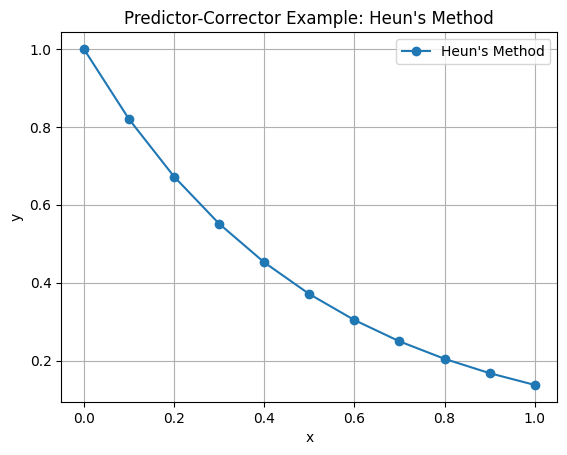

In [3]:
import matplotlib.pyplot as plt

# Example: Heun's Method for solving dy/dx = -2y, y(0) = 1
def f(x, y):
    return -2 * y

def heun_method(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]

    for i in range(n):
        y_pred = y_values[-1] + h * f(x_values[-1], y_values[-1])  # Predictor
        y_corr = y_values[-1] + (h/2) * (f(x_values[-1], y_values[-1]) + f(x_values[-1] + h, y_pred))  # Corrector

        x_values.append(x_values[-1] + h)
        y_values.append(y_corr)

    return x_values, y_values

# Solve the ODE
x_vals, y_vals = heun_method(f, 0, 1, 0.1, 10)

# Plot results
plt.plot(x_vals, y_vals, marker='o', label="Heun's Method")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictor-Corrector Example: Heun's Method")
plt.legend()
plt.grid(True)
plt.show()